<a href="https://colab.research.google.com/github/tussanakorn/Medical-Insurance-Prediction/blob/master/Medical_Insurance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Insurance Premium Prediction

---



In [32]:
!gdown --id 1McYhjHJdLYspvlKIwP6T5DXgViL0Ne16

Downloading...
From: https://drive.google.com/uc?id=1McYhjHJdLYspvlKIwP6T5DXgViL0Ne16
To: /content/Medicalpremium.csv
100% 30.8k/30.8k [00:00<00:00, 47.8MB/s]


# Get data

In [33]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype

In [34]:
df = pd.read_csv('/content/Medicalpremium.csv')
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


# EDA

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [36]:
df.describe(include = 'all')

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [37]:
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

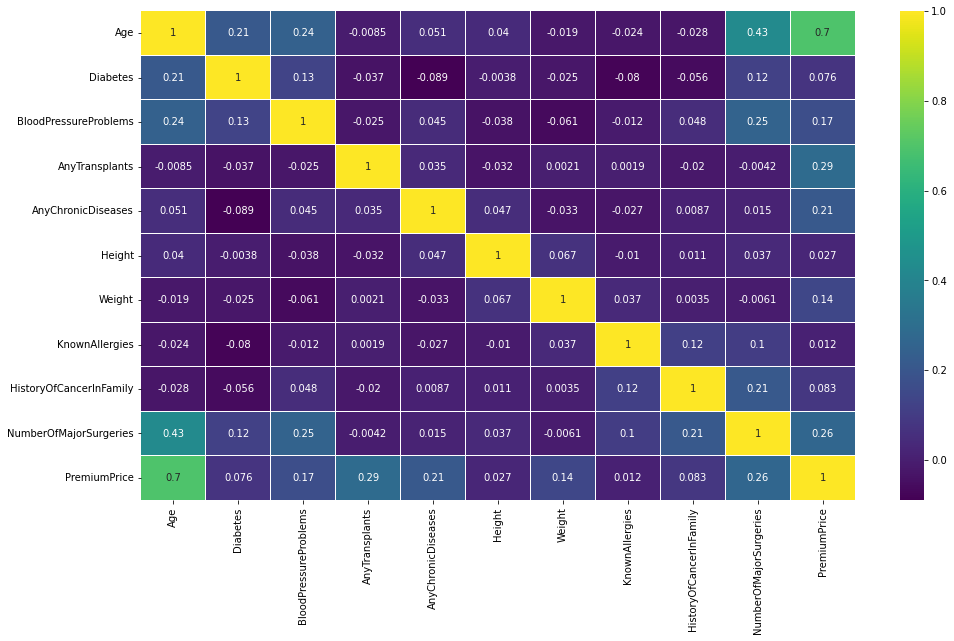

In [38]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True,cmap='viridis',linewidths=.1)

In [39]:
x=df.drop('PremiumPrice',axis=1)
y=df['PremiumPrice']

In [40]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2,k=10)
fit= bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores

,Specs,Score
0,Age,3684.410789
1,Diabetes,38.131379
2,BloodPressureProblems,47.971786
3,AnyTransplants,605.471967
4,AnyChronicDiseases,300.219653
5,Height,9.630908
6,Weight,631.927366
7,KnownAllergies,39.431808
8,HistoryOfCancerInFamily,268.761684
9,NumberOfMajorSurgeries,513.597250


In [41]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.39513251 0.02366781 0.02264193 0.03773325 0.04870581 0.11000553
 0.15925372 0.0231587  0.03275875 0.14694198]


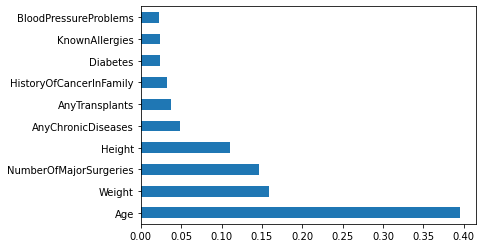

In [42]:
feat_imp =pd.Series(model.feature_importances_,index=x.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.show()

In [43]:
# X = x.drop(['Diabetes','KnownAllergies','BloodPressureProblems'],axis=1)
# x.head()

# Train model

In [44]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.3,random_state=43)

In [45]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Create Model

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score

## DecisionTreeClassifier

In [47]:
d_tree = DecisionTreeClassifier()
mod_tree = d_tree.fit(X_train,Y_train)
y_pred_tree= mod_tree.predict(X_test)
y_prob_tree =mod_tree.predict_proba(X_test)
acc=accuracy_score(Y_test,y_pred_tree)
acc

0.8918918918918919

## RandomForestClassifier

In [48]:
rf = RandomForestClassifier()
mod_rf = rf.fit(X_train,Y_train)
y_pred_rf = mod_rf.predict(X_test)
y_prob_rf = mod_rf.predict_proba(X_test)
acc=accuracy_score(Y_test,y_pred_rf)
acc

0.9358108108108109

## RandomForestRegressor

In [49]:
rfr = RandomForestRegressor()
mod_rfr = rfr.fit(X_train,Y_train)

from sklearn.metrics import mean_squared_error
import math

predictions = mod_rfr.predict(X_test)
MSE = mean_squared_error(predictions, Y_test)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

2626.816617227122


## GradientBoostingRegressor

In [50]:
XGB = GradientBoostingRegressor()
mod_XGB = XGB.fit(X_train, Y_train)

from sklearn.metrics import mean_squared_error
import math

predictions = XGB.predict(X_test)
MSE = mean_squared_error(predictions, Y_test)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

2787.0738446883606


In [51]:
y_predict = mod_rfr.predict(X_test)
y_predict

array([20250., 15020., 24460., 15750., 23000., 28970., 29640., 25000.,
       30530., 23210., 25000., 23140., 28680., 26630., 28970., 16280.,
       28020., 23520., 23780., 34120., 30000., 23000., 23000., 19020.,
       15000., 23000., 21280., 28000., 25120., 22950., 15290., 28910.,
       25120., 29000., 18970., 23000., 30250., 17140., 23080., 23080.,
       22980., 23070., 23000., 21120., 28990., 31420., 23000., 34350.,
       29300., 20570., 24700., 25000., 28020., 28490., 25100., 28120.,
       25400., 15210., 23000., 23180., 36280., 23000., 15300., 23440.,
       27110., 28000., 25000., 23250., 37190., 19080., 25640., 23000.,
       21100., 37700., 15970., 24350., 16770., 21080., 23130., 23000.,
       28000., 20220., 15420., 15000., 23000., 28970., 32280., 21730.,
       28120., 25000., 37240., 25000., 25000., 15000., 25100., 28000.,
       23630., 21160., 28640., 15240., 18790., 33870., 28000., 23000.,
       22260., 28970., 37510., 24580., 23000., 30270., 29000., 23710.,
      

In [52]:
from sklearn.metrics import mean_squared_error , r2_score

rmse = np.sqrt(mean_squared_error(Y_test,y_predict))
print('RMSE (Root Mean Squared Error) =',round(rmse,3))

r2 = r2_score(Y_test,y_predict)
print('R2 score =',round(r2,3))

RMSE (Root Mean Squared Error) = 2626.817
R2 score = 0.835


In [53]:
print(len(Y_test))
print(len(y_predict))

296
296


In [54]:
compare_df = Y_test.to_frame()
compare_df.head()

,PremiumPrice
462,15000
883,15000
711,23000
617,15000
497,23000


In [55]:
compare_df = compare_df.reset_index(drop=True)
compare_df.head()

,PremiumPrice
0,15000
1,15000
2,23000
3,15000
4,23000


In [56]:
df_y_predict = pd.DataFrame(y_predict,columns=['y_predict'])
df_y_predict.head()

,y_predict
0,20250.0
1,15020.0
2,24460.0
3,15750.0
4,23000.0


In [57]:
compare_df.insert(1,'PremiumPrice_predict',df_y_predict)
compare_df.head(20)

,PremiumPrice,PremiumPrice_predict
0,15000,20250.0
1,15000,15020.0
2,23000,24460.0
3,15000,15750.0
4,23000,23000.0
5,35000,28970.0
6,29000,29640.0
7,25000,25000.0
8,38000,30530.0
9,23000,23210.0


save model

In [58]:
import joblib
joblib.dump(mod_rfr, "rf_model.joblib")

['rf_model.joblib']